# entropy

Shannon Entropy measures uncertainty in a random variable $X$, unit is bit, how many bits are needed to send the information

$$
H(X) = -\sum_i p(x_i) \log_2 p(x_i)
$$

$p(x_i)$ is probability of event $x_i$ occurs

properties of entropy

- additivity: two independent events carry twice surprice $H(X+Y)=H(X)+H(Y)$

- positive uncertainty $H(X)>=0$

- no surprise in certainty $H(1)=0$ if $P(X)=1$

- permutation invariance

- monotonicity: a distribution with M uniformly distributed outcomes has less uncertainty than one with M+1

    e.g., a fair coin has less uncertainty than a fair dice

    $H(\text{fair coin}) = -1/2 \log 1/2 \times 2 = 1$ bit

    $H(\text{fair dice}) = -1/6 \log 1/6 \times 6 = 2.6$ bit


- entropy is also a measure of spread of a random variable, but not affects by scale as **variance**

## conditional entropy

- measures uncertainty in a random variable $Y$ given knowledge about another variable $X$

$$
H(Y|X) \leq H(Y)
$$

## mutual information

-  mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. it quantifies the "amount of information" obtained about one random variable by observing the other random variable.

$$
I(X, Y) = H(Y) - H(Y|X)
$$

another definition is compare joint distribution to marginal distribution
$$
I(X, Y)=\sum_{y \in Y}\sum_{x \in X}p(x, y)\log\frac{p(x, y)}{p(x)p(y)}
$$


- MI is difference between entropy of random variable $Y$ and conditional entropy of $Y$ given another random variable $X$

- properties

    - non-negative $I(X, Y) \geq 0$

    - symmetric $I(X, Y) = H(Y) - H(Y|X) = H(X) - H(X|Y)$

    - conditioning on a third variable can increase/decrease MI between 2 variables, so MI is hard for more than 2 dimensions

    - data processing inequality: X -> Channel -> Y -> Processing -> Z: $I(X, Z) \leq I(Y, Z)$

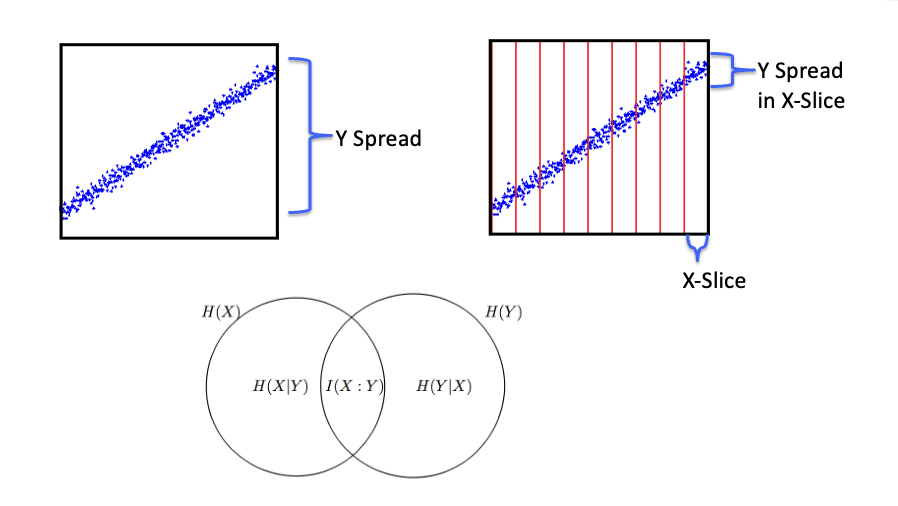

# compare probability distribution

- for 2 parallel distributions (disjoint supports) with horizontal distance $d$

    TV = 1, KL divergence = $\infty$, JS divergence = $\log 2$, EMD = |d|

https://shivgahlout.github.io/2021-01-26-WGAN/

## total-variation distance (TV)

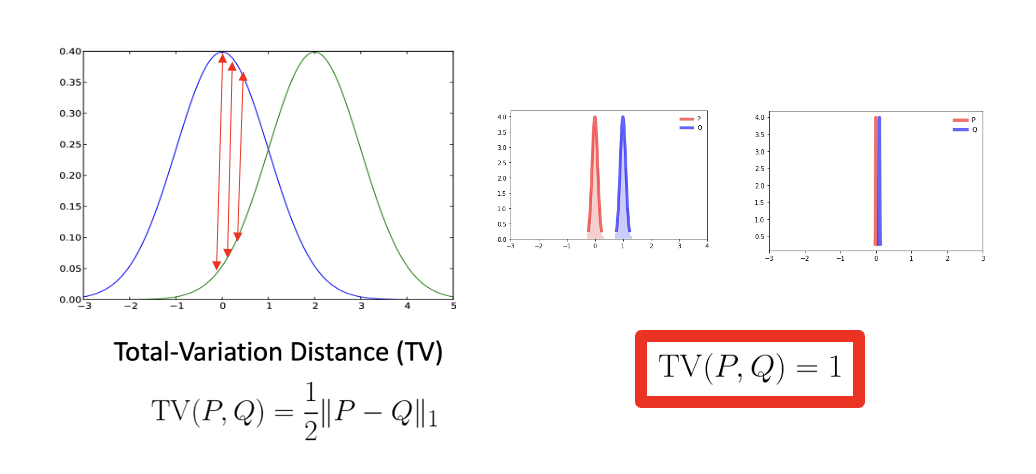

$$
TV(P, Q)=\frac{1}{2}\left\| P-Q \right\|_1
$$

- drawback: for 2 distributions have no overlap, TV is always 1

## cross entropy

- given 2 distributions P and Q, average number of bits needed to encode P by code optimized for Q

$$
H(P, Q) = -\sum_{x \in \mathcal{X}} p(x) \log_2 q(x)
$$

## KL Divergence

- also called relative entropy

- given 2 distributions P and Q, **extra** number of bits needed to encode P by code optimized for Q

$$
KL(P\parallel Q) = -\sum_{x \in \mathcal{X}} p(x) \log_2 \frac{q(x)}{p(x)} = H(P, Q)-H(P)
$$

- properties: not a distance

    - asymmetrix

    - not follow triangle inequality

## Jensen-Shannon divergence

$$
D_{JS}(P\parallel Q) = \frac{1}{2}KL(p\parallel\frac{p+q}{2})+\frac{1}{2}KL(q\parallel\frac{p+q}{2})
$$

## EMD (earth mover's distance)

- EMD 挖土机距离 measures the minimum amount of work required to convert one distribution to another

    to move earth piled at one distribution to another piles defined by another distribution.  

- problem: computational challenges. primal form $O(n^3)$ and entropic regularization $O(n^2)$

### discrete distribution

- EMD: minimize

$$
c = \sum_{(x, y)}\Gamma_{x, y}D_{x, y}
$$

$\Gamma$ is joint distribution of 2 distributions $\theta$ and $r$

$$
\sum_{x}\Gamma_{x, y} = p(y)\\[1em]
\sum_{y}\Gamma_{x, y} = q(x)
$$

#### Entropic regularization

- if there was no cost, we would spread mass evenly

$$
c = \sum_{(x, y)}\Gamma_{x, y}D_{x, y} - \frac{1}{\lambda}H(\Gamma)
$$

$H(\Gamma)=-\sum_{(x, y)}\Gamma_{x, y}\log (\Gamma_{x, y})$ is regularization term

- reason: make a more stochastic transport and faster easier optimization

- solution: $\Gamma_{x, y} = \alpha_x \beta_y e^{-\lambda D_{x, y}}$

#### Relation to Boltzman (Gibbs) Distribution 

Boltzman distribution is a distribution in statistical mechanics, where the probability that system in a certain state is a function of that state’s energy and temperature

$$
p_i \propto \exp\left( -\frac{\epsilon_i}{kT}\right)
$$

$p_i$ is the probability of the system being in state i 

negative exponential dependence on the energy of that state (states with higher energy have lower probability) 

mitigated by the overall temperature $T$ of the system 

$$\Gamma_{x, y} = e^{-\lambda D_{x, y}}$$

Here $\lambda$ is inverse of temperature, and $D$ is the “energy”


#### Solving: Sinkhorn iteration algorithm

- given $D, P, Q, \lambda$

- initialize $\Gamma_{x, y} = e^{-\lambda D_{x, y}}$

- repeat

    - rescale row of $\Gamma$ so that $\sum_{x}\Gamma_{x, y} = p(y)$

    - rescale columns of $\Gamma$ so that $\sum_{y}\Gamma_{x, y} = q(x)$



#### EMD optimization

This problem has linear constraints and linear objective and therefore can be solved using an LP solver (linear program)

However, this is not terribly efficient because the fastest LP solvers are polynomial in the size of the distribution support   


### continuous distribution

- in continuous setting, EMD is called Wasserstein distance, try to minimize the objective


$$
W(p, q) = \inf_{\pi \in \Pi(p, q)} \underset{(x, y) \sim \pi}{\mathbb{E}} \left\| x-y\right\|_2
$$

- **Kantorovich Rubenstein Duality**: convert intractable minimization objective to maximize over **1-Lipschitz function**, its' a saddle-point problem, don't need a linear program

$$
W(p, q) 
= \sup_{\left\| f \right\|_{L \leq 1}} \underset{x \sim p}{\mathbb{E}} f(x) -  \underset{y \sim q}{\mathbb{E}} f(y)\\[1em]
= \leq \int_x \int_y \left\| x-y\right\|_2 \pi(x, y)dx dy
$$

$\left\| x-y\right\|_2$ is ground 'cost' or distance



$\sup$ is supremum - least upper bound, $inf$ is infimum - greatest upper bound

- the witness function has to be **lipschitz continuous**: more smooth than usual continuous


## MMD (maximum mean discrepancy)

- Motivation: we don't need density estimate to compute a distance between distributions, we can use affinity matrix calculated from kernel defined on distance matrix.

- MMD quantifies how similar 2 set of samples $P, Q$ are picking a pair $X_i, X_j$ from distribution P and a pair $Y_i, Y_j$ from distribution Q

    calculate difference between within-distribution similarities $X_i, X_j$ and $Y_i, Y_j$ and cross-distribution similarities $X_i, Y_i$ and $X_j, Y_j$

$$
MMD(p, q) = \frac{1}{m^2}\sum_{i, j\in m}K(p_i, p_j)-\frac{2}{mn}\sum_{i, j}K(p_i, q_j)+\frac{1}{n^2}\sum_{i, j\in n}K(q_i, q_j)
$$

### function view

- $F$ is witness function

$$
MMD(P, Q, F) = \sup_{f\in F}[\mathbb{E}_Pf(x)-\mathbb{E}_Qf(y)]
$$

$\sup$ is least upper bound

### feature view

- MMD is distance between feature means

$$
\begin{align}
MMD^2(P, Q) 
&= \left\|\mu_P - \mu_Q \right\|_F^2 \\[1em]
&= \left<\mu_P, \mu_P \right>+\left<\mu_Q, \mu_Q \right>-2\left<\mu_P, \mu_Q \right> \\[1em]
&= \underbrace{\mathbb{E}_PK(x, x')+\mathbb{E}_QK(y, y')}_{\text{within-dist similarity}}-\underbrace{2\mathbb{E}_{P, Q}K(x, y)}_{\text{cross-dist similarity}} \\[1em]
\end{align}
$$

### mean trick

- MMD is a special implementation of dual that uses kernel trick

| kernel trick                                                                                                     | mean trick                                                                                                                             |
|------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|
| given $x \in \mathcal{X}$, define feature map $\varphi(x) \in \mathcal{F}$   $$\varphi(x)=[...\varphi_i(x)...]$$ | given $P$ a Borel probability measure on $\mathcal{X}$, define feature map $\mu_P \in \mathcal{F}$ $$\mu_P=[...\mathbb{E}_P[\varphi_i(x)]...]$$ |
| for positive definite kernel $k(x, x')$ $$k(x, x') = \left< \varphi(x), \varphi(x')\right>$$                     | for positive definite kernel $k(x, x')$, for $x \sim P, y \sim Q$ $$\mathbb{E}_{P,Q}k(x, y) = \left< \mu_P, \mu_Q\right>$$                      |
| reproducing property: $\forall f \in \mathcal{F}$ $$f(x)=\left< f(\cdot), \varphi(x)\right>$$                   | mean trick: $\mu_P$ is a mean/distribution embedding $$\mathbb{E}_Pf(x)=\left< f(\cdot), \mu_P\right>$$                                        |

# duality

- duality: optimization problem can be viewed in 2 perspectives, primal problem and dual problem. 

-  weak duality: the solution to the primal is an upper bound to the solution of the dual, and the solution of the dual is a lower bound to the solution of the primal.

- strong duality:  For convex problems, solutions of primal and dual are the same under a constraint.

- duality gap: the difference between optimal values of the primal and dual problems.

## dual of a linear program

|            | primal form                                   | dual form                                  |
|------------|-----------------------------------------------|--------------------------------------------|
|            | minimize $z = \mathbf{c}^T\mathbf{x}$           | maximize $\tilde z = \mathbf{b}^T\mathbf{y}$ |
| constraint | $A\mathbf{x}= \mathbf{b}, \mathbf{x} \geq 0$ | $A^T \mathbf{y} \leq c$                      |

- weak duality $z=\mathbf{c}^T\mathbf{x} \geq \mathbf{y} ^T A \mathbf{x} = \mathbf{y}^T \mathbf{b}=\tilde z$

- strong duality $z=\tilde z$